## ARIMA model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


In [11]:
# Load the cleaned data
df_cleaned = pd.read_csv('df_cleaned.csv')

# Convert 'Order Date' to datetime format
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

# Set 'Order Date' as the index and sort by date
df_cleaned.set_index('Order Date', inplace=True)
df_cleaned = df_cleaned.sort_index()

# Display the first few rows of the cleaned data
df_cleaned.head()


,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,Order ID,Order Priority,Order Quantity,Product Base Margin,...,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code,z_score
Order Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,28774,High,32,0.68,...,East,4031,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131,-0.445074
2012-01-01,Bowie,NaN,Matt Collister,Home Office,0.08,1,13729,Not Specified,9,NaN,...,East,1914,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715,-0.252005
2012-01-02,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,37537,Low,4,0.56,...,West,5272,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559,-0.149747
2012-01-02,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,44069,Critical,43,0.39,...,West,6225,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640,-0.323886
2012-01-02,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,37537,Low,43,0.69,...,West,5273,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559,0.643631


In [13]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

# Apply the ADF test to the 'Sales' column
adf_test(df_cleaned['Sales'])

#p-value below 0.05 -> no differencing required

ADF Statistic: -54.138517652273734
p-value: 0.0


In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_size = int(len(df_cleaned) * 0.8)
train, test = df_cleaned.iloc[:train_size], df_cleaned.iloc[train_size:]


In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to the training set (example: p=1, d=1, q=1)
model = ARIMA(train['Sales'], order=(1, 1, 1))
model_fit = model.fit()


C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


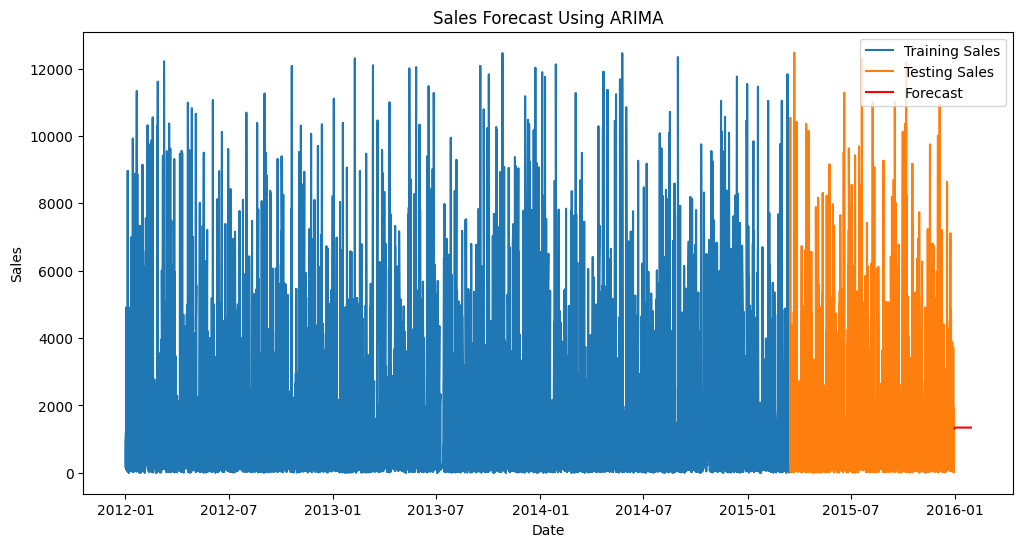

In [23]:
# Forecast the next 30 steps
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create forecast index
forecast_index = pd.date_range(test.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(train['Sales'], label='Training Sales')
plt.plot(test['Sales'], label='Testing Sales')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [24]:
# Calculate Mean Squared Error (MSE) of the forecast
mse = mean_squared_error(test['Sales'], forecast)
print(f'Mean Squared Error of the forecast: {mse}')


ValueError: Found input variables with inconsistent numbers of samples: [1639, 30]

In [19]:
# Fit the ARIMA model (example: p=1, d=1, q=1)
model = ARIMA(df_cleaned['Sales'], order=(1, 1, 1))       #1,1,1---ARIMA model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 8191
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -74251.319
Date:                Sun, 12 Jan 2025   AIC                         148508.637
Time:                        16:21:20   BIC                         148529.669
Sample:                             0   HQIC                        148515.828
                               - 8191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0160      0.011      1.406      0.160      -0.006       0.038
ma.L1         -1.0000      0.008   -132.765      0.000      -1.015      -0.985
sigma2      4.384e+06   1.69e-09   2.59e+15      0.0

C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


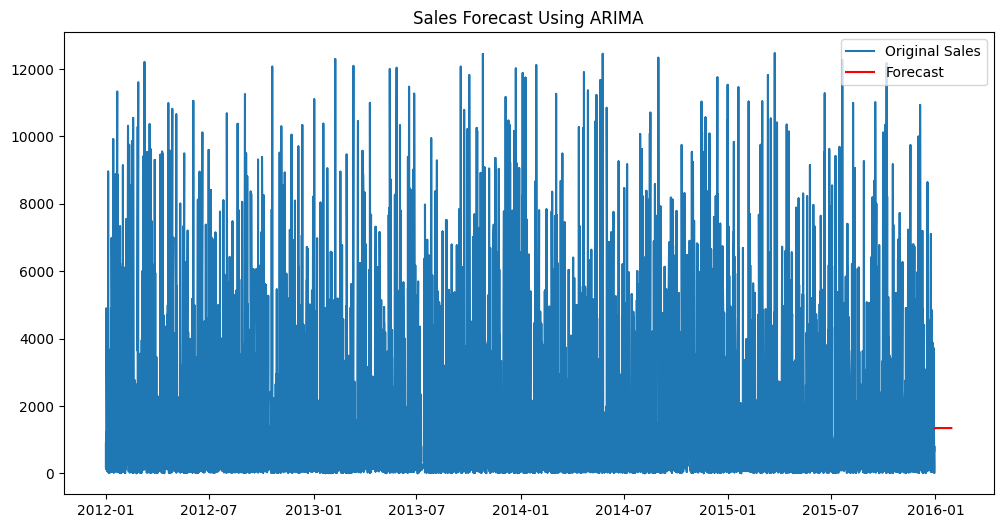

Mean Squared Error of the forecast: 1723579.6531769305


In [16]:
# Forecast the next 30 steps (example: 30 days ahead)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original data and the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Sales'], label='Original Sales')
plt.plot(pd.date_range(df_cleaned.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast Using ARIMA')
plt.show()

# Calculate the mean squared error (MSE) of the forecast
mse = mean_squared_error(df_cleaned['Sales'][-forecast_steps:], forecast)
print(f'Mean Squared Error of the forecast: {mse}')


C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


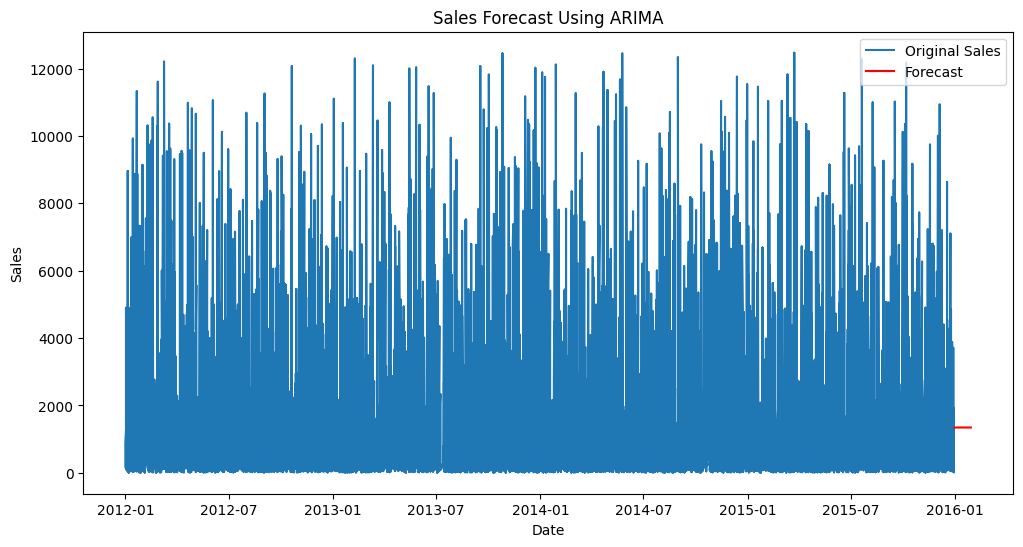

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Forecast the next 30 steps (e.g., 30 days ahead)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecasted period (after the last date in the data)
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the original data and the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Sales'], label='Original Sales')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Since we do not have actual future data, MSE cannot be calculated. 
# If you had actual future data, you could calculate the MSE as follows:
# mse = mean_squared_error(actual_future_sales, forecast)
# print(f'Mean Squared Error of the forecast: {mse}')


C:\Users\deven\AppData\Local\Temp\ipykernel_30436\4174683594.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_data = df['Sales'].resample('M').sum()


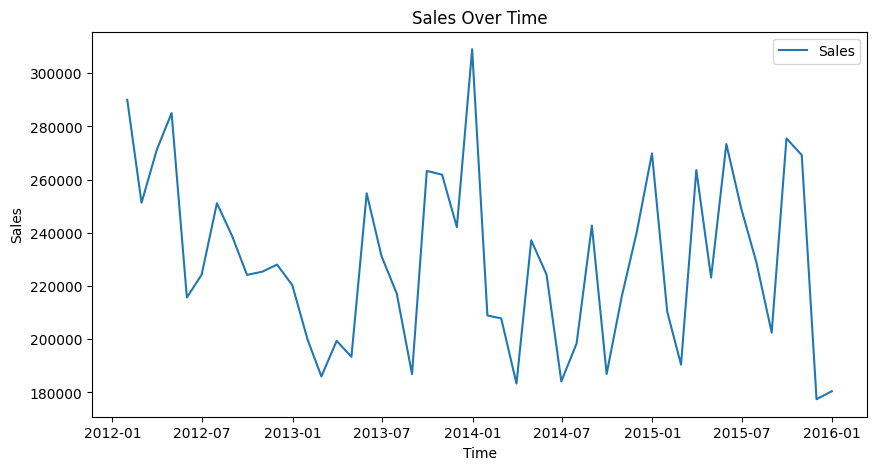

In [3]:
# Load the dataset
df = pd.read_csv("df_cleaned.csv")

# Ensure the dataset is time-indexed
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Resample data to monthly frequency (or as needed)
sales_data = df['Sales'].resample('M').sum()

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [4]:
# 1. Stationarity Test using ADF
adf_result = adfuller(sales_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# If the data is not stationary (p-value > 0.05), difference it
if adf_result[1] > 0.05:
    sales_data_diff = sales_data.diff().dropna()
    plt.figure(figsize=(10, 5))
    plt.plot(sales_data_diff, label='Differenced Sales')
    plt.title('Differenced Sales Over Time')
    plt.legend()
    plt.show()
else:
    sales_data_diff = sales_data

ADF Statistic: -5.559918212198157
p-value: 1.5501819385381168e-06


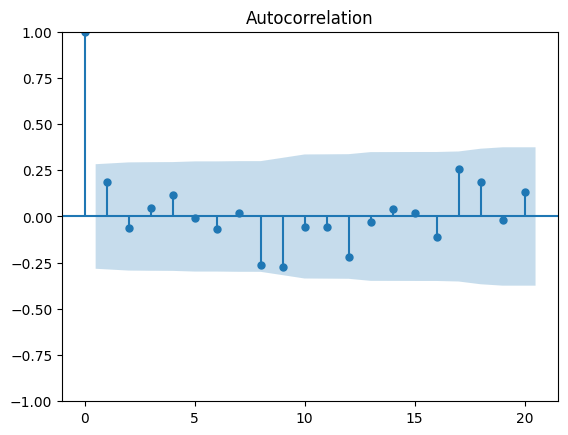

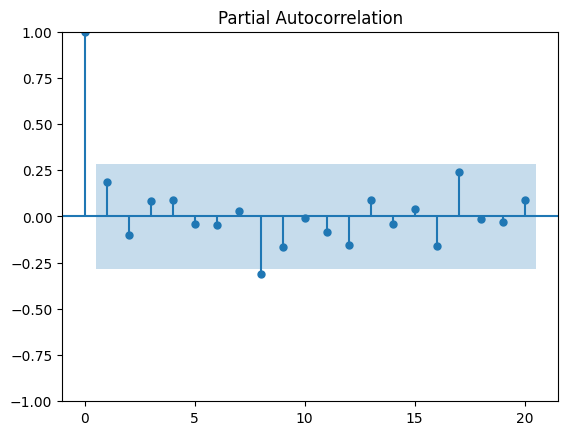

In [5]:
# 2. Determine ARIMA parameters using ACF and PACF
plot_acf(sales_data_diff, lags=20)
plot_pacf(sales_data_diff, lags=20)
plt.show()


In [6]:
# 3. Fit the ARIMA model (Adjust p, d, q based on ACF and PACF plots)
model = ARIMA(sales_data, order=(1, 1, 1))  # Replace (1, 1, 1) with chosen parameters
model_fit = model.fit()

C:\Users\deven\myenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [7]:

# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -558.686
Date:                Sun, 12 Jan 2025   AIC                           1123.371
Time:                        16:11:33   BIC                           1128.922
Sample:                    01-31-2012   HQIC                          1125.460
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3642      0.113      3.228      0.001       0.143       0.585
ma.L1         -0.9985      0.227     -4.406      0.000      -1.443      -0.554
sigma2      1.102e+09    2.1e-10   5.26e+18      0.0

In [8]:
# 4. Forecasting
forecast_steps = 12  # Number of future periods to forecast
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=sales_data.index[-1], periods=forecast_steps+1, freq='M')[1:]
forecast = pd.Series(forecast, index=forecast_index)

C:\Users\deven\AppData\Local\Temp\ipykernel_30436\2996170222.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=sales_data.index[-1], periods=forecast_steps+1, freq='M')[1:]


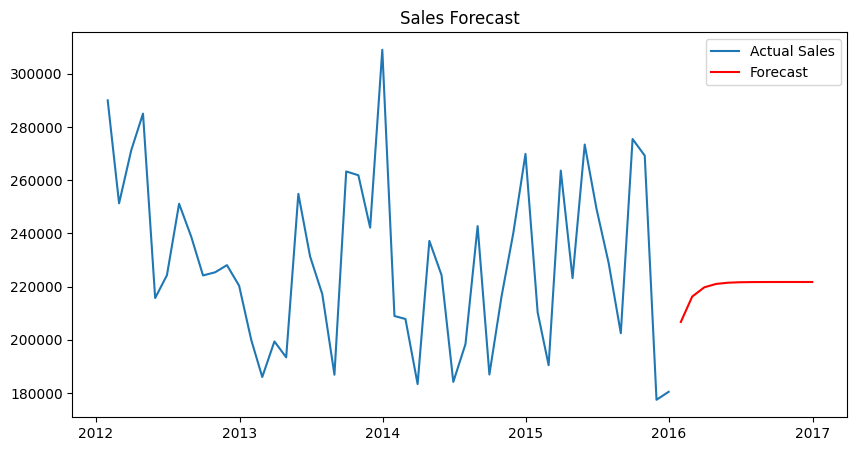

In [9]:
# Plot actual data and forecast
plt.figure(figsize=(10, 5))
plt.plot(sales_data, label='Actual Sales')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [10]:
# Evaluate Model (if you have test data)
# Split data into train/test sets (80-20 split)
train_size = int(len(sales_data) * 0.8)
train, test = sales_data[:train_size], sales_data[train_size:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
test_forecast = model_fit.forecast(steps=len(test))
error = mean_squared_error(test, test_forecast)
print(f"Test MSE: {error}")

Test MSE: 1776064947.297686
